In [1]:
from signals import Sinusoid, Chirp
from recurrence_plots import RecurrencePlot, RecurrencePlotCalculator
from embeddings import LagEmbedding
from embeddings.utils import mutual_information, fnn
import numpy as np
import matplotlib.pyplot as plt
from signal_processing import PCA

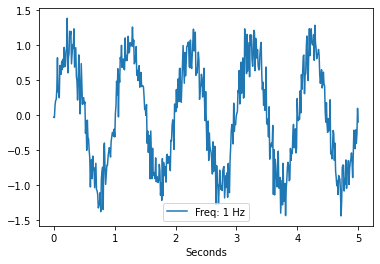

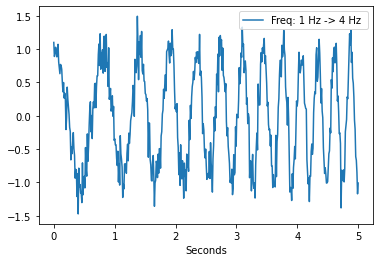

In [2]:
# Create two artificial signals
secs = 5
Fs = 100
s1 = Sinusoid(frequency=1, sec=secs, sampling_rate=Fs, noise_rate=0.2)
s1.show()
s2 = Chirp(frequency_start=1, frequency_end=4, sec=secs, sampling_rate=Fs, noise_rate=0.2)
s2.show()

In [3]:
# Stack signal to create a multivariate signal
s = np.vstack([s1.data.T, s2.data.T]).T
s.shape

(500, 2)

In [4]:
# Find embedding parameters
lag = mutual_information(s)
dim = fnn(s, lag=lag)
embedding = LagEmbedding(dim=int(dim), lag=lag)

# Create a RP calculator
calculator = RecurrencePlotCalculator(embedding=embedding, metric="euclidean")
str(calculator)

/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: divide by zero encountered in log
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: invalid value encountered in multiply
  I_matrix = Pxy*np.log(Pxy/(Px*Py))


"RecurrencePlotCalculator(metric='euclidean', embedding=LagEmbedding(dim=3, lag=12))"

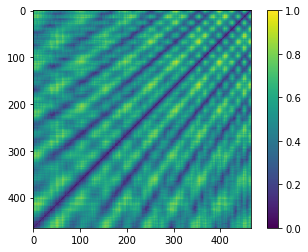

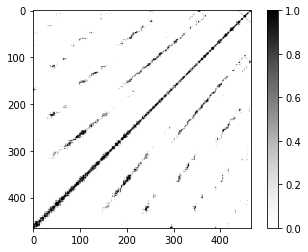

In [5]:
# generate and illustrate RP
rp = calculator.generate(signal=s)
rp.normalize()
rp.show()
rp.show(thresholded=True, epsilon=0.2, cmap="Greys")

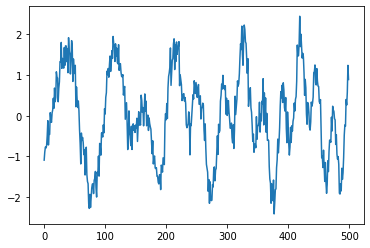

In [6]:
# PCA
plt.plot(PCA(s, num_pcs=1))
plt.show()

/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: divide by zero encountered in log
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: invalid value encountered in multiply
  I_matrix = Pxy*np.log(Pxy/(Px*Py))


Lag: 15 | Dim: 3


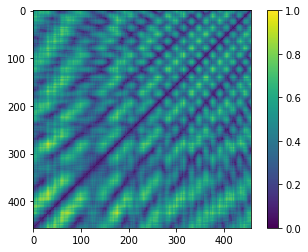

In [7]:
# RP from first PCA
signal = PCA(s, num_pcs=1)
lag = mutual_information(signal)
dim = fnn(signal, lag=lag)

embedding = LagEmbedding(dim=dim, lag=lag)
print(f"Lag: {lag} | Dim: {dim}")

calculator = RecurrencePlotCalculator(embedding=embedding, metric="euclidean")
rp = calculator.generate(signal=signal)
rp.normalize()
rp.show()

In [8]:
# RP from a 12 lead ECG

from data_handling import NatureReader
import matplotlib.pyplot as plt

reader = NatureReader(path="../data/nature", use="noisy")
# This can take a while
ds = reader.get_dataset()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10646/10646 [02:22<00:00, 74.79it/s]


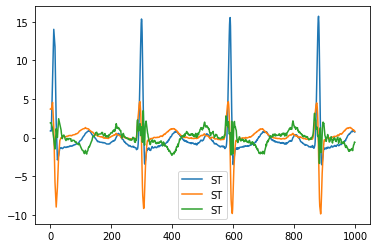

(1000, 3)

In [9]:
idx = 500
signal = PCA(ds[idx].x[:1000,:], var=0.9)

plt.plot(signal, label=ds[idx].y)
plt.legend()
plt.show()
signal.shape

/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: divide by zero encountered in log
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/MI_delay.py:503: RuntimeWarning: invalid value encountered in multiply
  I_matrix = Pxy*np.log(Pxy/(Px*Py))
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/FNN_n.py:76: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(abs(tsrecon[ind_m, -1]-tsrecon[ind, -1]), Dm)-Rtol, 0.5)
/Users/carstengieshoff/Library/Caches/pypoetry/virtualenvs/thesis-code-qbsXrjy9-py3.8/lib/python3.8/site-packages/teaspoon/parameter_selection/FNN_n.py:76: RuntimeWarning: invalid value encountered in true_divide
  np.d

RecurrencePlotCalculator(metric='cosine', embedding=LagEmbedding(dim=3, lag=18))


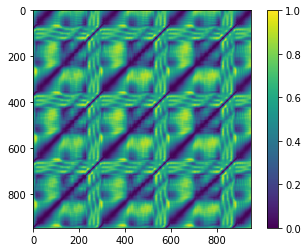

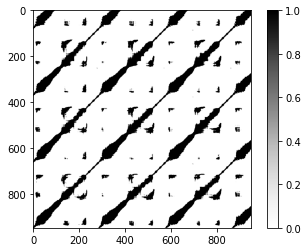

In [10]:
lag = mutual_information(signal)
dim = fnn(signal, lag=lag)
embedding = LagEmbedding(dim=int(dim), lag=lag)
calculator = RecurrencePlotCalculator(embedding=embedding, metric="cosine")
print(str(calculator))

rp = calculator.generate(signal=signal)
rp.normalize()
rp.show()
rp.show(thresholded=True, epsilon=0.2, cmap="Greys")

In [11]:
# ds_rp_s = calculator.generate_dataset([dp.x for dp in ds_uniform_length])